In [2]:
# Auto formatting
%load_ext nb_black

<IPython.core.display.Javascript object>

In [12]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv("../data/cleaned.csv", index_col=[0])
display(df)

,loan_amount,term,income,Credit_Score,Status,loan_limit_cf,loan_limit_ncf,submission_of_application_not_inst,submission_of_application_to_inst,co-applicant_credit_type_CIB,...,Region_North-East,Region_central,Region_south,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,360.0,1740.0,758,1,1,0,0,1,1,...,0,0,1,1,0,0,0,0,0,0
1,206500,360.0,4980.0,552,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,406500,360.0,9480.0,834,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
3,456500,360.0,11880.0,587,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
4,696500,360.0,10440.0,602,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135103,436500,180.0,7860.0,659,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
135104,586500,360.0,7140.0,569,0,1,0,1,0,1,...,0,0,1,1,0,0,0,0,0,0
135105,446500,180.0,6900.0,702,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
135106,196500,180.0,7140.0,737,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>

In [16]:
X = df.drop("Credit_Score", axis=1)
Y = df["Credit_Score"]

<IPython.core.display.Javascript object>

In [18]:
# Start analysis with value of arbitrary value of lambda
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    df.drop("Credit_Score", axis=1), df["Credit_Score"], test_size=0.3, random_state=0
)

n, m = Xtrain.shape
I = np.identity(m)
alpha = 0.1
beta = np.dot(
    np.dot(np.linalg.inv(np.dot(Xtrain.T, Xtrain) + alpha * I), Xtrain.T), Ytrain
)
display(beta)

array([ 3.88887556e-06, -7.10499664e-03, -3.48896503e-05, -1.55711554e-01,
        4.25280784e+01,  4.14130993e+01,  4.19766262e+01,  4.19649988e+01,
        4.20899910e+01,  4.18518281e+01,  3.72902296e+01,  4.66490143e+01,
        4.66497048e+01,  3.72906941e+01,  4.66524022e+01,  3.72907195e+01,
        4.13705946e+01,  4.25723252e+01,  4.18651889e+01,  4.20764024e+01,
        4.28946535e+01,  4.10468339e+01,  3.62706163e+01,  4.76708716e+01,
        4.13665741e+01,  4.25749141e+01,  4.16330645e+01,  4.23084238e+01,
        4.22483894e+01,  4.16930986e+01,  2.50595993e+01,  2.99230109e+01,
        2.89588783e+01,  2.54845563e+01,  3.62706163e+01,  2.21863152e+01,
        2.06266865e+01,  2.05515396e+01,  2.19299319e+01,  2.08333300e+01,
        1.36857966e+01,  1.55733669e+01,  3.51625161e+01,  1.95198082e+01,
        1.99662986e+01,  2.02811476e+01,  2.23882570e+01,  2.13057852e+01,
        2.01868899e+01,  2.11705417e+01,  2.02758452e+01,  2.23082108e+01,
        2.20859266e+01,  

<IPython.core.display.Javascript object>

In [23]:
variables = X.columns.tolist()
model_coef = pd.DataFrame({"coef": beta, "names": variables})
display(model_coef[model_coef["coef"] != 0].sort_values(by="coef", ascending=False))

,coef,names
23,47.670872,business_or_commercial_nob/c
14,46.652402,Security_Type_Indriect
12,46.649705,construction_type_mh
11,46.649014,Secured_by_land
20,42.894654,lump_sum_payment_lpsm
...,...,...
62,7.334779,age_>74
0,0.000004,loan_amount
2,-0.000035,income
1,-0.007105,term


<IPython.core.display.Javascript object>

(-0.05, 1.05, -40253177057.77473, 50493512595.92525)

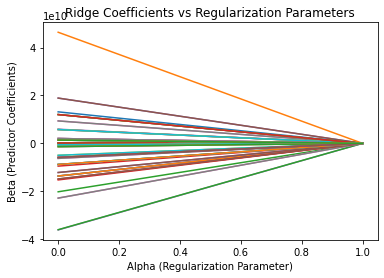

<IPython.core.display.Javascript object>

In [22]:
from sklearn.linear_model import Ridge

coef = []
alphas = range(0, 2)

for a in alphas:
    ridgereg = Ridge(alpha=a)
    ridgereg.fit(Xtrain, Ytrain)
    coef.append(ridgereg.coef_)

## Make plot of Beta as a function of Alpha
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas, coef)
ax.set_xlabel("Alpha (Regularization Parameter)")
ax.set_ylabel("Beta (Predictor Coefficients)")
ax.set_title("Ridge Coefficients vs Regularization Parameters")
ax.axis("tight")
